## Little-o
When we say a function $f(N)$ is $O(g(N))$, it's intuitively like saying that $f(N) \leq g(N)$ past some point (up to constants).   There is also a stricter version we can use if $g(N)$ completely dominates $f(N)$, which is more like a strict inequality $f(N) < g(N)$. This is the so-called ``little-o notation.'' In particular,

$f(n)$ is $o(g(n))$ if *for every* constant $c > 0$, there exists an $M$ so that

$f(N) < c g(N)$ for all $N \geq M$

This is a much stronger condition than $O(g(N))$, which only required us to find a single constant $c$ to make this true.  So if a function is $o(g(N))$, then this implies that is is also $O(g(N))$.

If we rework the definition a bit, we can redefine little-o as follows

Given some $c > 0$, there exists an $M$ so that
### $ \frac{f(N)}{g(N)} \leq c, N \geq M$

If we go back to calculus, this looks a heck of a lot like a limit.  In fact, the above observation is practically the proof of the following lemma:

> Lemma 1: Limits and Little-o <BR><BR>
  If $f(N)$ is $o(g(N))$, then <BR><BR>
  $\lim_{N \to \infty} \frac{f(N)}{g(N)} = 0$


Let's look at an example

## Example 1: Monomials

Let's prove that $f(N) = N^p$ is $o(N^q)$ for any $q > p$.  Using lemma 1, we have

### $\lim_{N \to \infty} \frac{N^p}{N^q} = \lim_{N \to \infty} \frac{1}{N^{q-p}} = 0$

since $q-p$ > 0.  In this sense, we say that any monomial dominates all monomials of a lower degree.

As an example, we have that $N^2$ is $o(N^3)$.  This implies, among other things, that an algorithm that has to sort through all triples in a set is *strictly worse* than an algorithm that has to sort through all pairs.

To convince ourselves of this, let's make a couple of plots


Text(0.5, 1.0, 'Ratio Plot')

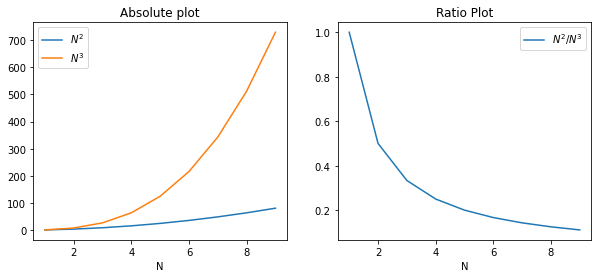

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = np.arange(1, 10)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(N, N**2)
plt.plot(N, N**3)
plt.legend(["$N^2$", "$N^3$"])
plt.xlabel("N")
plt.title("Absolute plot")
plt.subplot(122)
plt.plot(N, (N**2)/(N**3))
plt.legend(["$N^2 / N^3$"])
plt.xlabel("N")
plt.title("Ratio Plot")

## Example 2: Log vs Linear

Another thing we can prove is that $\log(N)$ is $o(N)$; or, in other words, $N$ dominates the log.  Let's try to plot this first


Text(0.5, 1.0, 'Ratio Plot')

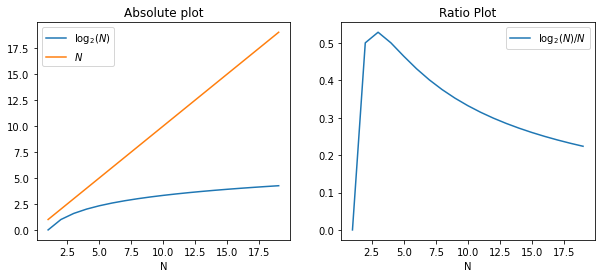

In [2]:
N = np.arange(1, 20)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(N, np.log2(N))
plt.plot(N, N)
plt.legend(["$\\log_2(N)$", "$N$"])
plt.xlabel("N")
plt.title("Absolute plot")
plt.subplot(122)
plt.plot(N, np.log2(N)/N)
plt.legend(["$\\log_2(N) / N$"])
plt.xlabel("N")
plt.title("Ratio Plot")

If we go to prove this by lemma 1, we have to show that the following limit goes to 0:

### $\lim_{N \to \infty} \frac{\log_2(N)}{N}$

If we're going to do this rigorously, the way to do this is to apply <a href = "https://tutorial.math.lamar.edu/Classes/CalcI/LHospitalsRule.aspx">L'Hopital's rule</a>.  In this case, we have the limit of a quotient of two functions that go to infinity, so L'Hopital's rule applies and tells us that this limit is equivalent to the limit of the quotient *of the derivatives of these functions*.  Recalling that the derivative of $log_b(x)$ is $1 / (ln(b) x)$, we have

### $\lim_{N \to \infty} \frac{\log_2(N)}{N} = \lim_{N \to \infty} \frac{1}{2 \ln(2) N} = 0$

So now we have a way to formally say that binary search crushes linear search, for example

## Example 3: Polynomial vs Exponential

We can also show that any polynomial grows more slowly and any exponential using this framework.  Since we only care about leading terms, this is like saying


### $N^p \text{ is } o(a^N)$

As an example, $2^N$ will eventually beat $N^{10}$, even though $N^{10}$ starts off larger, as seen below (I'm showing the y axis on a log scale since they both grow so quickly)

Text(0.5, 1.0, 'Ratio Plot')

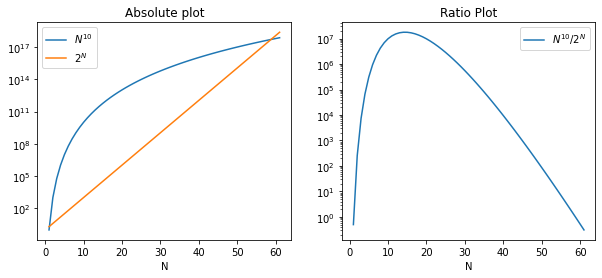

In [3]:
N = np.arange(1, 62)
f = N**10
g = 2**N
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(N, f)
plt.plot(N, g)
plt.yscale("log") 
plt.legend(["$N^{10}$", "$2^N$"])
plt.xlabel("N")
plt.title("Absolute plot")
plt.subplot(122)
plt.plot(N, f/g)
plt.yscale("log") 
plt.legend(["$N^{10} / 2^N$"])
plt.xlabel("N")
plt.title("Ratio Plot")

We can apply lemma 1 again

### $\lim_{N \to \infty} \frac{N^p}{a^N}$

Once again, we can apply L'Hopital's rule

### $\lim_{N \to \infty} \frac{N^p}{a^N} = \lim_{N \to \infty} \frac{p N p^{n-1}}{\ln(a)a^N}$

and we keep applying it repeatedly until there's just a constant in the numerator

### $\lim_{N \to \infty} \frac{p(p-1)(p-2)...(2)(1)}{\ln(a)^N a^N} = \frac{p!}{\ln(a)^N a^N}$

Therefore, this limit is once again zero, showing that any exponential dominates any polynomial!

## Example 4: Exponential vs Factorial

As one final example, we will show that any exponential $a^N$ is $o(N!)$.  So the factorial $N!$ ends up being the worst complexity we'll consider in this class.  As an example, look at $6^N$ vs $N!$

Text(0.5, 1.0, 'Ratio Plot')

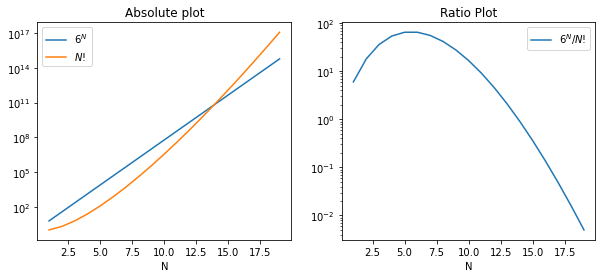

In [4]:
N = np.arange(1, 20)
f = 6**N
g = [np.prod(np.arange(1, n+1)) for n in N]
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(N, f)
plt.plot(N, g)
plt.yscale("log") 
plt.legend(["$6^N$", "$N!$"])
plt.xlabel("N")
plt.title("Absolute plot")
plt.subplot(122)
plt.plot(N, f/g)
plt.yscale("log") 
plt.legend(["$6^N / N!$"])
plt.xlabel("N")
plt.title("Ratio Plot")

We'll follow the same strategy using lemma 1, but one challenge is that we can't differentiate the factorial $N!$ because it's only defined at the integers.  Instead, we'll do a trick where we look at a continuous function $h(N)$ that's even smaller than $N!$ but which still satisfies $a^N$ is $o(h(N))$.  To do this, first note that by repeatedly applying the product rule of logarithms, $\log(AB) = \log(A) + \log(B)$, we have

$\log(N!) = \log(1) + \log(2) + \log(3) + ... + \log(N)$

We can visualize this as the area under the sequence of rectangles with bases 1 and heights as logs of the the natural numbers.  As shown below, this is strictly greater than the area under the curve $\log(N) - \log(1.5)$ from $2$ to $N$

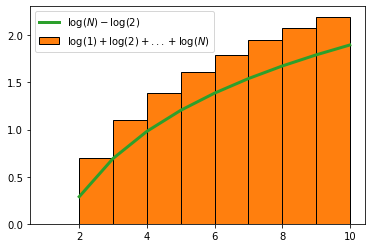

In [5]:
N = np.arange(1, 10)
plt.bar(N+0.5, np.log(N), width=1, edgecolor='k', facecolor='C1')
N = np.arange(2, 11)
plt.plot(N, np.log(N)-np.log(1.5), c='C2', linewidth=3)
plt.legend(["$\\log(N) - \\log(2)$", "$\\log(1) + \\log(2) + ... + \\log(N)$"])

We can verify that the antiderivative of $N \log N$ is $N \log N - N$, so the antiderivative of $\log N - \log (1.5)$ is 

### $N \log N - N(1 + \log(1.5))$

Let's let the log of our mystery function $h(N) < N!$ be the definite integral

### $\log h(N) = \int_{2}^{N} (\log x - \log (1.5) ) dx = \left[ x \log x - x(1 + \log (1.5)) \right]^{N}_2 = \\ N \log N - N(1 + \log(1.5)) - 2 \log 2 + 2(1 + \log(1.5))$

We'll define the nasty constant on the right as $c$, so we get

### $\log h(N) = N \log N - N(1 + \log(1.5)) + c$

If we raise $e$ to this to undo the effect of taking the log in the first place, we get

# $h(N) = e^{N \log N - N(1 + \log(1.5)) + c} = \frac{e^c N^N}{ e^{N(1 + \log(1.5))} }$

Let's plot this to see how close it is to the factorial, and to demonstrate empirically that it's a lower bound


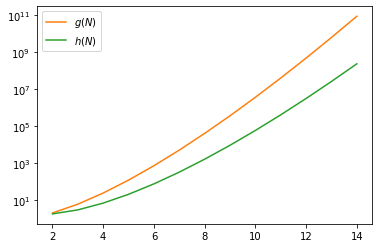

In [6]:
def hfn(N):
    c = -2*np.log(2) + 2*(1 + np.log(2))
    return (np.exp(c)*(N**N)) / np.exp(N*(1+np.log(1.5)))
    
N = np.arange(2, 15)
g = [np.prod(np.arange(1, n+1)) for n in N]
h = [hfn(n) for n in N]
plt.plot(N, g, c='C1')
plt.plot(N, h, c='C2')
plt.yscale("log") 
plt.legend(["$g(N)$", "$h(N)$"])


As we can see visually, $h(N)$ grows like $g(N)$, but it is smaller.  Finally, let's now apply lemma 1 to show that $f(N) = a^N$ is $o(h(N))$ for any $a$.

#  $\lim_{N \to \infty} \frac{a^N}{ \frac{e^c N^N}{ e^{N(1 + \log(1.5))} } } =  \lim_{N \to \infty} \frac{a^N e^{N(1 + \log(1.5))} }{ e^c N^N }  $

This is a bit messy to evaluate, and I'll hold off on all of the details for now, but basically, the $N^N$ in the denominator will crush any exponential because $N$ will eventually exceed the base $a$, so this limit is 0.  Thus, after all of this, we've shown that $a^N$ is $o(N!)$.  Thus, $N!$ is the worst complexity we've seen